In [5]:
import altair as alt
import pandas as pd

# NOTE: THIS IS OLD DATA FOR SMHT007 USING WRONG REFERENCE
data_3ak = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [3, 5, 6, 38, 20, 7, 5, 1, 4, 1, 2, 4, 0, 2, 1]
}

data_3am = {
        'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [3, 0, 15, 43, 22, 11, 7, 4, 3, 3, 2, 0, 2, 0, 0]
}

data_3e = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [22, 12, 158, 80, 36, 20, 20, 8, 10, 5, 2, 1, 0, 4, 1]
}

data_3g = {
    'AF_range': [
        '0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05',
        '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.10',
        '0.10-0.11', '0.11-0.12', '0.12-0.13', '0.13-0.14', '0.14-0.15'
    ],
    'Count': [8, 3, 3, 41, 35, 8, 5, 7, 1, 5, 2, 4, 1, 3, 1]
}

df = pd.DataFrame(data_3g)

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('AF_range', sort=df['AF_range'].tolist(), title='AF Range'),
    y=alt.Y('Count', title='Variant Count'),
    tooltip=['AF_range', 'Count']
).properties(
    width=600,
    height=300,
    title='3G (descending colon) vs 3A (blood) AF Distribution'
)

chart

alt.Chart(...)

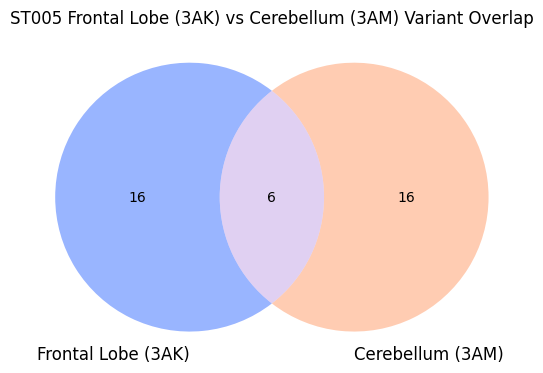

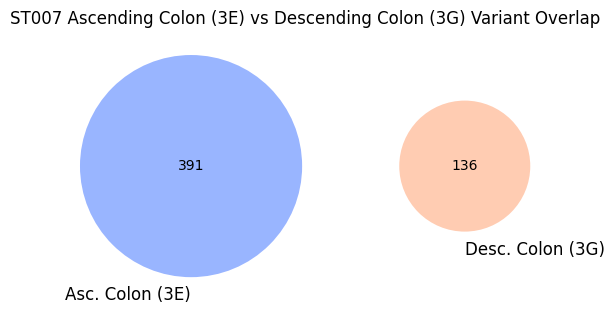

In [8]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# brain smht005
venn2(subsets = (16, 16, 6), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)'), set_colors=('#0046FF', '#FF8040'))
plt.title("ST005 Frontal Lobe (3AK) vs Cerebellum (3AM) Variant Overlap")
plt.show()

# colon smht005
venn2(subsets = (391, 136, 0), set_labels = ('Asc. Colon (3E)', 'Desc. Colon (3G)'), set_colors=('#0046FF', '#FF8040'))
plt.title("ST007 Ascending Colon (3E) vs Descending Colon (3G) Variant Overlap")
plt.show()


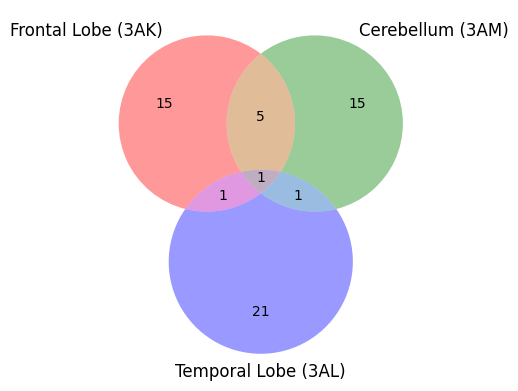

In [14]:
from matplotlib_venn import venn3

v=venn3(subsets = (15, 15, 5, 21, 1, 1, 1), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)', 'Temporal Lobe (3AL)'))
plt.show()

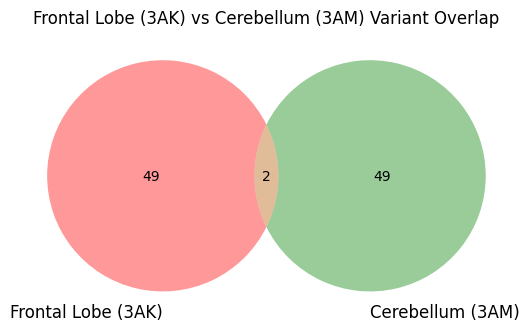

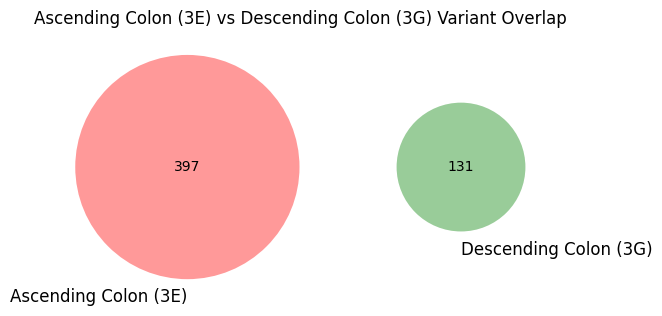

In [7]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (49, 49, 2), set_labels = ('Frontal Lobe (3AK)', 'Cerebellum (3AM)'))
plt.title("Frontal Lobe (3AK) vs Cerebellum (3AM) Variant Overlap")
plt.show()

venn2(subsets = (397, 131, 0), set_labels = ('Ascending Colon (3E)', 'Descending Colon (3G)'))
plt.title("Ascending Colon (3E) vs Descending Colon (3G) Variant Overlap")
plt.show()


In [ ]:
# TODO: upset plot

In [1]:
# Histogram of coverages for SMHT005

import altair as alt
import pandas as pd
import numpy as np

smht005_counts = [160, 175, 180, 180, 180, 200, 185]
smht007_counts = [160, 200, 235, 220, 220, 270, 175]

# Data taken from plugging merged bams into bam.iobio and recording here
data = pd.DataFrame({
    'category': ['Blood (3A)', 'Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)'], 
    'count': smht007_counts
})

custom_colors=['#7fc97f', '#feedde', '#fdbe85', '#fd8d3c', '#d94701', '#bcbddc', '#756bb1']

color_scale = alt.Scale(domain=['Blood (3A)', 'Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)'],
                        range=custom_colors)

bars = alt.Chart(data).mark_bar().encode(
    x=alt.X('category:N', title='Tissue', axis=alt.Axis(labelAngle=45), sort=['Blood (3A)', 'Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)']),
    y=alt.Y('count:Q', title='Count'),
    color=alt.Color('category:N', 
                   scale=color_scale,  # Use explicit color mapping
                   legend=None),
)

text = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    fontSize=18,
    dy=-3  # Offset text slightly above the bars
).encode(
    x=alt.X('category:N', sort=['Blood (3A)', 'Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)']),
    y=alt.Y('count:Q'),
    text=alt.Text('count:Q')
)

# Create histogram
chart = (bars + text).properties(
    width=1100,
    height=500,
    title='SMHT007 Tier 1 Tissues Average Coverage').configure_title(
    fontSize=44).configure_axis(
    labelFontSize=16,
    titleFontSize=20)

# Display the chart
chart.show()


alt.LayerChart(...)

In [134]:
# Histogram of variants called per tissue for SMHT005

import altair as alt
import pandas as pd
import numpy as np

smht005_counts = [28, 24, 28, 34, 79, 15]
smht007_counts = [102, 194, 120, 142, 391, 136]

# 
data = pd.DataFrame({
    'category': ['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)'], 
    'count': smht007_counts
})

custom_colors=['#feedde', '#fdbe85', '#fd8d3c', '#d94701', '#bcbddc', '#756bb1']

color_scale = alt.Scale(domain=['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)'],
                        range=custom_colors)

bars = alt.Chart(data).mark_bar().encode(
    x=alt.X('category:N', title='Tissue', axis=alt.Axis(labelAngle=45), sort=['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)']),
    y=alt.Y('count:Q', title='Count'),
    color=alt.Color('category:N', 
                   scale=color_scale,  # Use explicit color mapping
                   legend=None),
)

text = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    fontSize=18,
    dy=-3  # Offset text slightly above the bars
).encode(
    x=alt.X('category:N', sort=['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 
                                 'Cerebellum (3M)', 'Hippocampus (3O)', 
                                 'Asc. Colon (3E)', 'Desc. Colon (3G)']),
    y=alt.Y('count:Q'),
    text=alt.Text('count:Q')
)

# Create histogram
chart = (bars + text).properties(
    width=1100,
    height=500,
    title='SMHT007 RUFUS Called Variant Counts Per Tissue').configure_title(
    fontSize=44).configure_axis(
    labelFontSize=16,
    titleFontSize=20)

# Display the chart
chart.show()


alt.LayerChart(...)

In [2]:
# Histogram of binned VAF per tissue for SMHT005

import pandas as pd
import altair as alt
import numpy as np

# Create allele frequency bins
af_bins = []
af_bins = ['0-1%', '1-2%', '2-3%', '3-4%', '4-5%', 
           '5-6%', '6-7%', '7-8%', '8-9%', '9%+']

# Tissue categories (same as original)
tissues = []
tissues = ['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 'Cerebellum (3M)', 
           'Hippocampus (3O)', 'Asc. Colon (3E)', 'Desc. Colon (3G)']

counts = []
# /scratch/ucgd/lustre-labs/marth/scratch/u0746015/smaht_donor_tissue/rufus_runs/smht005/brain_vs_blood/filter_by_af.sh output concatenated in order
smht005_counts = [0, 1, 1, 1, 7, 7, 1, 1, 1, 2, 6, #3AK - 25
          0, 1, 1, 0, 9, 9, 4, 0, 0, 0, 0, #3AL - 24
          0, 0, 0, 0, 5, 11, 3, 3, 1, 1, 4, #3AM - 26
          0, 2, 0, 3, 14, 7, 2, 3, 2, 0, 1, #3AO - 33
          0, 10, 6, 10, 26, 11, 8, 2, 2, 4, #3E - 76
          0, 6, 0, 0, 6, 0, 2, 1, 0, 0, 0] #3G - 15

smht007_counts = [0, 3, 5, 5, 38, 20, 7, 5, 2, 4, 13, #3AK - 102
                0, 12, 5, 50, 76, 17, 5, 4, 8, 17, # 3AL - 194
                0, 3, 0, 15, 43, 22, 11, 7, 4, 15, # 3AM - 120
                0, 8, 3, 21, 61, 16, 13, 11, 4, 5, # 3AO - 142
                0, 21, 13, 159, 77, 38, 17, 18, 6, 42, # 3E - 391
                0, 8, 3, 3, 41, 35, 8, 6, 7, 25] #3G - 136

data_rows = []
for i, tissue in enumerate(tissues):
    for j, af_bin in enumerate(af_bins):
        # Calculate the correct index in the counts array
        count_index = i * len(af_bins) + j
        count_value = smht007_counts[count_index]
        data_rows.append({'af_bin': af_bin, 'tissue': tissue, 'count': count_value})

data = pd.DataFrame(data_rows)

# Same color scheme as original
custom_colors = ['#feedde', '#fdbe85', '#fd8d3c', '#d94701', '#bcbddc', '#756bb1']
color_scale = alt.Scale(domain=tissues, range=custom_colors)

# Create grouped bar chart
bars = alt.Chart(data).mark_bar().encode(
    x=alt.X('af_bin:N',
            title='Allele Frequency Bins',
            axis=alt.Axis(labelAngle=-45),  # Explicitly set label rotation
            sort=af_bins),
    y=alt.Y('count:Q', title='Count'),
    color=alt.Color('tissue:N',
                    scale=color_scale,
                    title='Tissue Type'),
    xOffset=alt.XOffset('tissue:N', sort=tissues),
    tooltip=['af_bin:N', 'tissue:N', 'count:Q']
)

# Create the text labels
text_labels = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    fontSize=14,
    dy=-2
).encode(
    x=alt.X('af_bin:N', sort=af_bins),
    y=alt.Y('count:Q'),
    color=alt.value('black'),
    text=alt.Text('count:Q'),
    xOffset=alt.XOffset('tissue:N', sort=tissues)
)

# Combine bars and text
grouped_chart = (bars + text_labels).properties(
    width=1200,
    height=400,
    title='SMHT007 Variant Counts by Allele Frequency Bins and Tissue Type'
).configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=16,
    titleFontSize=20
)

# Display the grouped chart (you can switch to the faceted version by using 'bars + text' instead)
grouped_chart.show()

alt.LayerChart(...)

In [3]:
# Histogram of binned VAF per tissue for SMHT005
import pandas as pd
import altair as alt
import numpy as np

# Create allele frequency bins
af_bins = ['0-1%', '1-2%', '2-3%', '3-4%', '4-5%', 
           '5-6%', '6-7%', '7-8%', '8-9%', '9%+']

# Tissue categories (same as original)
tissues = ['Frontal Lobe (3K)', 'Temporal Lobe (3L)', 'Cerebellum (3M)',
           'Hippocampus (3O)', 'Asc. Colon (3E)', 'Desc. Colon (3G)']

# /scratch/ucgd/lustre-labs/marth/scratch/u0746015/smaht_donor_tissue/rufus_runs/smht005/brain_vs_blood/filter_by_af.sh output concatenated in order
smht005_counts = [0, 1, 1, 1, 7, 7, 1, 1, 1, 2, 6, #3AK - 25
          0, 1, 1, 0, 9, 9, 4, 0, 0, 0, 0, #3AL - 24
          0, 0, 0, 0, 5, 11, 3, 3, 1, 1, 4, #3AM - 26
          0, 2, 0, 3, 14, 7, 2, 3, 2, 0, 1, #3AO - 33
          0, 10, 6, 10, 26, 11, 8, 2, 2, 4, #3E - 76
          0, 6, 0, 0, 6, 0, 2, 1, 0, 0, 0] #3G - 15

smht007_counts = [0, 3, 5, 5, 38, 20, 7, 5, 2, 4, 13, #3AK - 102
                0, 12, 5, 50, 76, 17, 5, 4, 8, 17, # 3AL - 194
                0, 3, 0, 15, 43, 22, 11, 7, 4, 15, # 3AM - 120
                0, 8, 3, 21, 61, 16, 13, 11, 4, 5, # 3AO - 142
                0, 21, 13, 159, 77, 38, 17, 18, 6, 42, # 3E - 391
                0, 8, 3, 3, 41, 35, 8, 6, 7, 25] #3G - 136

# FIXED: Properly structure the data
data_rows = []
for i, tissue in enumerate(tissues):
    for j, af_bin in enumerate(af_bins):
        # Calculate the correct index in the counts array
        count_index = i * len(af_bins) + j
        count_value = smht007_counts[count_index]
        data_rows.append({'af_bin': af_bin, 'tissue': tissue, 'count': count_value})

data = pd.DataFrame(data_rows)

# Same color scheme as original
custom_colors = ['#feedde', '#fdbe85', '#fd8d3c', '#d94701', '#bcbddc', '#756bb1']
color_scale = alt.Scale(domain=tissues, range=custom_colors)

# Create line chart to show trends
line_chart = alt.Chart(data).mark_line(
    point=True,  # Add points at each data point
    strokeWidth=2
).encode(
    x=alt.X('af_bin:N',
            title='Allele Frequency Bins',
            axis=alt.Axis(labelAngle=-45),
            sort=af_bins),
    y=alt.Y('count:Q', title='Count'),
    color=alt.Color('tissue:N',
                    scale=color_scale,
                    title='Tissue Type'),
)

# Add text labels at the points
text_labels = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    fontSize=9,
    dy=-8  # Offset above the points
).encode(
    x=alt.X('af_bin:N', sort=af_bins),
    y=alt.Y('count:Q'),
    text=alt.condition(alt.datum.count > 0, alt.Text('count:Q'), alt.value(''))  # Only show non-zero values
)

# Combine lines and text
grouped_chart = (line_chart + text_labels).properties(
    width=800,
    height=400,
    title='SMHT007 Variant Count Trends by Allele Frequency and Tissue Type'
).configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).resolve_scale(
    color='independent'
)

# Display the line chart
grouped_chart.show()

alt.LayerChart(...)

✓ Input data validation passed
Detected samples: ['3AK', '3AL', '3AM', '3AO']


<Figure size 1400x1000 with 0 Axes>

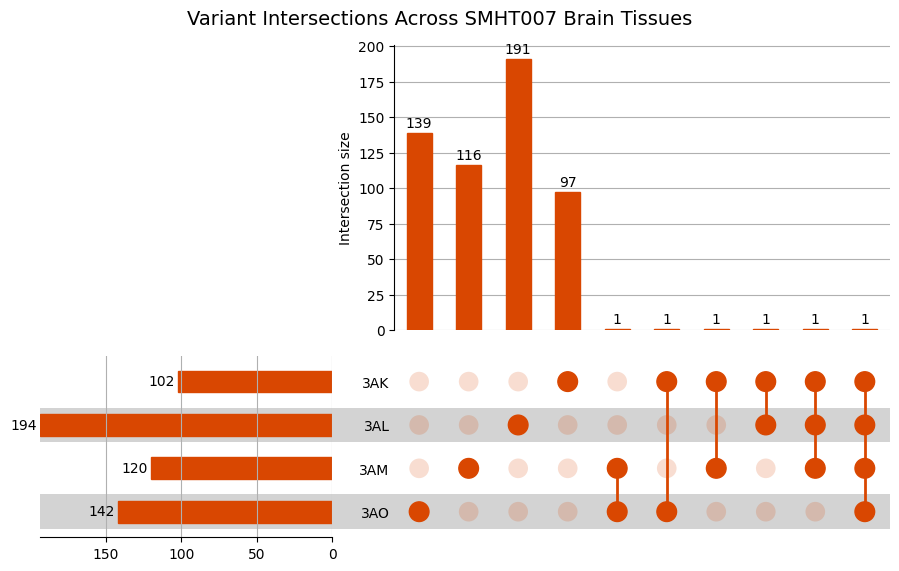

In [7]:
import pandas as pd
import numpy as np
from upsetplot import UpSet
import matplotlib.pyplot as plt
import warnings

# Suppress pandas future warnings related to inplace operations
warnings.filterwarnings('ignore', category=FutureWarning)

def create_upset_from_intersection_counts(intersection_data, sample_names=None):
    """
    Create an UpSet plot from intersection count data.
    
    Parameters:
    -----------
    intersection_data : dict
        Dictionary where keys are intersection strings (e.g., 'A&B&C') 
        and values are counts
    sample_names : list, optional
        List of sample names. If None, will be inferred from the data.
    
    Returns:
    --------
    pandas.Series with MultiIndex for upsetplot
    """
    
    # If sample_names not provided, infer from the data
    if sample_names is None:
        all_samples = set()
        for intersection_str in intersection_data.keys():
            samples_in_intersection = intersection_str.split('&')
            all_samples.update(samples_in_intersection)
        sample_names = sorted(list(all_samples))
    
    print(f"Detected samples: {sample_names}")
    
    # Create multi-index data more explicitly to avoid pandas warnings
    index_tuples = []
    counts = []
    
    for intersection_str, count in intersection_data.items():
        # Parse which samples are in this intersection
        samples_in_intersection = set(intersection_str.split('&'))
        
        # Create boolean tuple for this intersection
        membership = tuple(sample in samples_in_intersection for sample in sample_names)
        
        index_tuples.append(membership)
        counts.append(count)
    
    # Create MultiIndex explicitly
    multi_index = pd.MultiIndex.from_tuples(
        index_tuples, 
        names=sample_names
    )
    
    # Create Series with the counts - ensure it's properly formatted
    series = pd.Series(data=counts, index=multi_index, dtype=int)
    
    # Remove any zero counts to clean up the plot
    series = series[series > 0]
    
    # Sort by values (descending) to show largest intersections first
    series = series.sort_values(ascending=False)
    
    return series, sample_names

def plot_upset(series, sample_names, title="UpSet Plot", figsize=(12, 8), sample_colors=None, **kwargs):
    """
    Create and display the UpSet plot.
    
    Parameters:
    -----------
    series : pd.Series
        Series with MultiIndex containing the intersection counts
    sample_names : list
        List of sample names
    title : str
        Plot title
    figsize : tuple
        Figure size
    sample_colors : dict or list, optional
        Colors for each sample. Can be:
        - dict: {'A': 'red', 'B': 'blue', ...}
        - list: ['red', 'blue', 'green', ...] (in order of sample_names)
        - None: uses default colors
    **kwargs : additional arguments for UpSet
    """
    
    # Suppress the tight_layout warning
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', message='This figure includes Axes that are not compatible with tight_layout')
        
        fig = plt.figure(figsize=figsize)
        
        # Default UpSet parameters (can be overridden by kwargs)
        upset_params = {
            'show_counts': True,
            'sort_by': 'degree',
            'facecolor': '#d94701',
            #'facecolor': '#756bb1',
            'shading_color': 'lightgray',
            'sort_categories_by': 'cardinality',
            'min_subset_size': 1,  # Show all intersections with at least 1 variant
            'element_size': None,  # Don't normalize - show actual counts
            'totals_plot_elements': 6  # Limit number of total elements shown
        }
        upset_params.update(kwargs)
        
        try:
            upset = UpSet(series, **upset_params)
            upset.plot()
        
            
            # Now customize the dot colors in the matrix plot
            # Find the intersection matrix axes
            axes = fig.get_axes()
            matrix_ax = None
            
            # The matrix plot is typically one of the lower axes
            for ax in axes:
                # Look for the axis that has scatter plots (dots)
                if hasattr(ax, 'collections') and len(ax.collections) > 0:
                    # Check if this looks like the matrix plot
                    if any(hasattr(coll, 'get_offsets') and len(coll.get_offsets()) > 0 
                           for coll in ax.collections):
                        matrix_ax = ax
                        break
            
            if matrix_ax is not None:
                # Clear existing dots and redraw with custom colors
                matrix_ax.clear()
                
                # Get the intersection data to redraw the matrix
                intersections = []
                for idx, count in series.items():
                    intersections.append(idx)
                
                # Redraw the matrix with colored dots
                for col_idx, intersection in enumerate(intersections):
                    for row_idx, (sample_name, is_present) in enumerate(zip(sample_names, intersection)):
                        if is_present:
                            # Draw filled dot with sample-specific color
                            matrix_ax.scatter(col_idx, row_idx, 
                                            c=sample_colors[sample_name], 
                                            s=100, 
                                            edgecolors='black', 
                                            linewidths=0.5,
                                            zorder=3)
                        else:
                            # Draw gray dot for non-membership
                            matrix_ax.scatter(col_idx, row_idx, 
                                            c='lightgray', 
                                            s=30, 
                                            alpha=0.3,
                                            zorder=1)
                
                # Draw connecting lines for multi-sample intersections
                for col_idx, intersection in enumerate(intersections):
                    present_rows = [i for i, is_present in enumerate(intersection) if is_present]
                    if len(present_rows) > 1:
                        # Draw vertical line connecting present samples
                        min_row = min(present_rows)
                        max_row = max(present_rows)
                        matrix_ax.plot([col_idx, col_idx], [min_row, max_row], 
                                     'black', linewidth=2, alpha=0.6, zorder=2)
                
                # Set up the matrix axes
                matrix_ax.set_xlim(-0.5, len(intersections) - 0.5)
                matrix_ax.set_ylim(-0.5, len(sample_names) - 0.5)
                matrix_ax.set_xticks([])
                matrix_ax.set_yticks(range(len(sample_names)))
                matrix_ax.set_yticklabels(sample_names)
                matrix_ax.invert_yaxis()
                matrix_ax.grid(True, alpha=0.3)
                
                # Remove x-axis labels as they're not needed in the matrix
                matrix_ax.set_xlabel('')
            
            # Add title with manual positioning to avoid layout issues
            plt.suptitle(title, fontsize=14, y=0.98)
            
            # Use subplots_adjust instead of tight_layout for better control
            plt.subplots_adjust(top=0.92, bottom=0.1, left=0.1, right=0.95, hspace=0.3, wspace=0.3)
            
            # Add a color legend for samples only
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor=color, edgecolor='black', label=name) 
                             for name, color in sample_colors.items()]
            plt.figlegend(handles=legend_elements, 
                         loc='upper left', 
                         bbox_to_anchor=(0.02, 0.98),
                         title='Samples')
            
            plt.show()
            
            return upset
            
        except Exception as e:
        #     print(f"Error creating UpSet plot: {e}")
        #     print("Falling back to summary statistics...")
            
        #     # Print data summary if plot fails
        #     print(f"\nData Summary:")
        #     print(f"Series shape: {series.shape}")
        #     print(f"Series index names: {series.index.names}")
        #     print(f"Top 10 intersections:")
        #     print(series.sort_values(ascending=False).head(10))
            
             return None

def validate_intersection_data(intersection_data):
    """
    Validate the input data format and provide helpful error messages.
    """
    if not isinstance(intersection_data, dict):
        raise ValueError("intersection_data must be a dictionary")
    
    if len(intersection_data) == 0:
        raise ValueError("intersection_data cannot be empty")
    
    # Check for valid format
    for key, value in intersection_data.items():
        if not isinstance(key, str):
            raise ValueError(f"All keys must be strings, found: {type(key)}")
        
        if not isinstance(value, (int, float)):
            raise ValueError(f"All values must be numeric, found: {type(value)} for key '{key}'")
        
        if value < 0:
            raise ValueError(f"All values must be non-negative, found: {value} for key '{key}'")
        
        # Check that intersection string uses '&' separator
        if '&' not in key and len(key.split('&')) == 1:
            # Single sample - this is OK
            pass
        elif '&' in key:
            # Multiple samples - check format
            samples = key.split('&')
            if any(len(sample.strip()) == 0 for sample in samples):
                raise ValueError(f"Invalid intersection format: '{key}'. Check for empty sample names.")
    
    print("✓ Input data validation passed")
    return True

# Example usage with 6 samples
def main_example():
    """
    Example with 6 samples (3AK, 3AL, 3AM, 3AO, 3E, 3G)
    """
    
    smht005_brain_isecs = {
        '3AK': 17,
        '3AL': 21,   
        '3AM': 18,
        '3AO': 25,
        '3AK&3AL': 0,
        '3AK&3AM': 4,
        '3AK&3AO': 4,
        '3AL&3AM': 1,
        '3AL&3AO': 0,
        '3AM&3AO': 3,
        '3AK&3AL&3AM': 1,
        '3AK&3AL&3AO': 1,
        '3AK&3AM&3AO': 1,
        '3AL&3AM&3AO': 0,
        '3AK&3AL&3AM&3AO': 0
    }

    # /scratch/ucgd/lustre-labs/marth/scratch/u0746015/smaht_donor_tissue/intersections/new_ref/ST005_vs_ST005/all_degrees
    smht005_all_isecs = {
        '3AK': 17,
        '3AL': 21,
        '3AM': 17,
        '3AO': 24,
        '3E': 73,
        '3G': 13,
        '3AK&3AL': 0,
        '3AK&3AM': 4,
        '3AK&3AO': 4,
        '3AK&3E': 0,
        '3AK&3G': 0,
        '3AL&3AM': 0,
        '3AL&3AO': 0,
        '3AL&3E': 0,
        '3AL&3G': 0,
        '3AM&3AO': 1,
        '3AM&3E': 1,
        '3AM&3G': 0,
        '3AO&3E': 0,
        '3AO&3G': 0,
        '3E&3G': 0,
        '3AK&3AL&3AM': 1,
        '3AK&3AL&3AO': 0,
        '3AK&3AL&3E': 0,
        '3AK&3AL&3G': 0,
        '3AK&3AM&3AO': 1,
        '3AK&3AM&3E': 0,
        '3AK&3AM&3G': 0,
        '3AK&3AO&3E': 0,
        '3AK&3AO&3G': 0,
        '3AK&3E&3G': 0,
        '3AL&3AM&3AO': 0,
        '3AL&3AM&3E': 1,
        '3AL&3AM&3G': 0,
        '3AL&3AO&3E': 0,
        '3AL&3AO&3G': 0,
        '3AL&3E&3G': 0,
        '3AM&3AO&3E': 2,
        '3AM&3AO&3G': 0,
        '3AM&3E&3G': 0,
        '3AO&3E&3G': 1,
        '3AK&3AL&3AM&3AO': 0,
        '3AK&3AL&3AM&3E': 0,
        '3AK&3AL&3AM&3G': 0,
        '3AK&3AL&3AO&3E': 0,
        '3AK&3AL&3AO&3G': 0,
        '3AK&3AL&3E&3G': 0,
        '3AK&3AM&3AO&3E': 0,
        '3AK&3AM&3AO&3G': 0,
        '3AK&3AM&3E&3G': 0,
        '3AK&3AO&3E&3G': 0,
        '3AL&3AM&3AO&3E': 0,
        '3AL&3AM&3AO&3G': 0,
        '3AL&3AM&3E&3G': 0,
        '3AL&3AO&3E&3G': 0,
        '3AM&3AO&3E&3G': 0,
        '3AK&3AL&3AM&3AO&3E': 0,
        '3AK&3AL&3AM&3AO&3G': 0,
        '3AK&3AL&3AM&3E&3G': 0,
        '3AK&3AL&3AO&3E&3G': 1,
        '3AK&3AM&3AO&3E&3G': 0,
        '3AL&3AM&3AO&3E&3G': 0,
        '3AK&3AL&3AM&3AO&3E&3G': 0
    }

    smht007_all_isecs = {
        '3AK': 97,
        '3AL': 191, 
        '3AM': 115,
        '3AO': 138, 
        '3E': 389,
        '3G': 135,
        '3AK&3AL': 1,
        '3AK&3AM': 1,
        '3AK&3AO': 1,
        '3AK&3E': 0,
        '3AK&3G': 0,
        '3AL&3AM': 0,
        '3AL&3AO': 0,
        '3AL&3E': 0,
        '3AL&3G': 0,
        '3AM&3AO': 1,
        '3AM&3E': 0,
        '3AM&3G': 1,
        '3AO&3E': 1,
        '3AO&3G': 0,
        '3E&3G': 0,
        '3AK&3AL&3AM': 1,
        '3AK&3AL&3AO': 0,
        '3AK&3AL&3E': 0,
        '3AK&3AL&3G': 0,
        '3AK&3AM&3AO': 0,
        '3AK&3AM&3E': 0,
        '3AK&3AM&3G': 0,
        '3AK&3AO&3E': 0,
        '3AK&3AO&3G': 0,
        '3AK&3E&3G': 0,
        '3AL&3AM&3AO': 0,
        '3AL&3AM&3E': 0,
        '3AL&3AM&3G': 0,
        '3AL&3AO&3E': 0,
        '3AL&3AO&3G': 0,
        '3AL&3E&3G': 0,
        '3AM&3AO&3E': 0,
        '3AM&3AO&3G': 0,
        '3AM&3E&3G': 0,
        '3AO&3E&3G': 0,
        '3AK&3AL&3AM&3AO': 0,
        '3AK&3AL&3AM&3E': 0,
        '3AK&3AL&3AM&3G': 0,
        '3AK&3AL&3AO&3E': 0,
        '3AK&3AL&3AO&3G': 0,
        '3AK&3AL&3E&3G': 0,
        '3AK&3AM&3AO&3E': 0,
        '3AK&3AM&3AO&3G': 0,
        '3AK&3AM&3E&3G': 0,
        '3AK&3AO&3E&3G': 0,
        '3AL&3AM&3AO&3E': 0,
        '3AL&3AM&3AO&3G': 0,
        '3AL&3AM&3E&3G': 0,
        '3AL&3AO&3E&3G': 0,
        '3AM&3AO&3E&3G': 0,
        '3AK&3AL&3AM&3AO&3E': 1,
        '3AK&3AL&3AM&3AO&3G': 0,
        '3AK&3AL&3AM&3E&3G': 0,
        '3AK&3AL&3AO&3E&3G': 0,
        '3AK&3AM&3AO&3E&3G': 0,
        '3AL&3AM&3AO&3E&3G': 0,
        '3AK&3AL&3AM&3AO&3E&3G': 0
    }

    smht007_brain_isecs = {
        '3AK': 97,
        '3AL': 191, 
        '3AM': 116,
        '3AO': 139,
        '3AK&3AL': 1,
        '3AK&3AM': 1,
        '3AK&3AO': 1,
        '3AL&3AM': 0,
        '3AL&3AO': 0,
        '3AM&3AO': 1,
        '3AK&3AL&3AM': 1,
        '3AK&3AL&3AO': 0,
        '3AK&3AM&3AO': 0,
        '3AL&3AM&3AO': 0,
        '3AK&3AL&3AM&3AO': 1
    }
    
    # Validate input data
    validate_intersection_data(smht007_all_isecs)
    
    # Specify sample names explicitly (optional - will be inferred if not provided)
    sample_names = ['3AK', '3AL', '3AM', '3AO']
    
    # Create the UpSet plot
    series, detected_samples = create_upset_from_intersection_counts(
        smht007_brain_isecs, sample_names
    )
    
    # print(f"\nCreated series with {len(series)} intersections")
    # print(f"Sample order: {detected_samples}")
    
    upset = plot_upset(
        series, 
        detected_samples,
        title="Variant Intersections Across SMHT007 Brain Tissues",
        figsize=(14, 10),
        min_subset_size=1,     # Show all intersections with at least 1 variant
        show_counts=True,      # Show count numbers on bars
        sort_by='degree', # Sort by intersection size
        sort_categories_by='-input'  # Sort sample categories by size
    )
    
    # Print summary
    # if series is not None:
    #     print(f"\nSummary:")
    #     print(f"Total intersections: {len(series)}")
    #     print(f"Total variants across all intersections: {series.sum()}")
    #     print(f"Largest intersection: {series.max()} variants")
    #     print(f"Smallest intersection: {series.min()} variants")
    #     print(f"Mean intersection size: {series.mean():.1f} variants")
        
    #     # Show top intersections
    #     print(f"\nTop 10 intersections by size:")
    #     top_intersections = series.sort_values(ascending=False).head(10)
    #     for idx, value in top_intersections.items():
    #         # Convert boolean tuple back to sample names
    #         samples_in_intersection = [sample_names[i] for i, is_member in enumerate(idx) if is_member]
    #         intersection_str = '&'.join(samples_in_intersection)
    #         print(f"  {intersection_str}: {value} variants")
    
    return series, upset

if __name__ == "__main__":
    # Run the example
    series, upset = main_example()